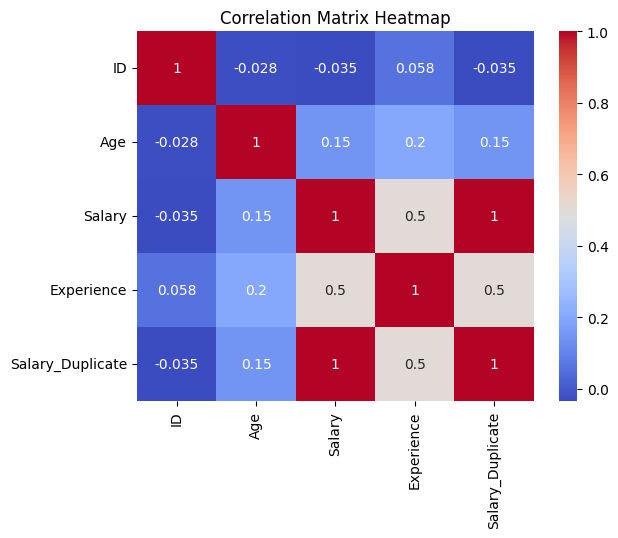

In [1]:
import seaborn as ays #used to plot the heatmap and  advance data visualization
import numpy as np #used to create the correlation matrix
import matplotlib.pyplot as plt #used to plot the heatmap and  advance data visualization
import pandas as pd

df=pd.read_csv('Feature_Selection_DS[1].csv')
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select numeric columns only
# Drop non-numeric columns

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
ays.heatmap(corr_matrix, annot=True, cmap='coolwarm') #annot used to show the correlation values in the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

In [3]:

from sklearn.feature_selection import SelectKBest, chi2  # Import SelectKBest and chi2 for feature selection
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # Import MinMaxScaler & LabelEncoder

# Step 1: Load the dataset (Assuming it's stored in 'data.csv')


# Step 2: Handle missing values (Fill NaN in numerical columns with 0)
df.fillna(0, inplace=True)

# Step 3: Encode categorical features
label_encoders = {}  # Store label encoders for future inverse transformation

for col in ["Name", "Gender", "Address", "Random_Text"]:  # Categorical columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Save encoder for later use

# Step 4: Separate features (X) and target variable (y)
X = df.drop(columns=["Purchase"])  # Drop the target column
y = df["Purchase"].map({"Yes": 1, "No": 0})  # Convert target labels to numerical values

# Step 5: Scale feature values (Chi-Square test requires non-negative values)
scaler = MinMaxScaler()  # Initialize MinMaxScaler
X_scaled = scaler.fit_transform(X)  # Scale feature values between 0 and 1

# Step 6: Apply Chi-Square feature selection
k_best = SelectKBest(score_func=chi2, k=2)  # Select top 2 best features
X_new = k_best.fit_transform(X_scaled, y)  # Apply the selection process

# Step 7: Print selected feature names
selected_features = X.columns[k_best.get_support()]  # Get names of selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Experience', 'Gender'], dtype='object')


In [18]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#df = pd.read_csv(".csv")

# Ensure no non-numeric data
X = df.drop(columns=["Purchase"])  # Drop target column
y = df["Purchase"]

# Convert categorical features to numeric
X = pd.get_dummies(X)

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Scale the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling successful!")


Scaling successful!


In [4]:
import pandas as pd  # Import pandas for data handling
from sklearn.feature_selection import RFE  # Import Recursive Feature Elimination
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree model
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for categorical encoding

# Step 1: Load the dataset
df = pd.read_csv("Feature_Selection_DS[1].csv")  # Ensure correct file path

# Debug: Print column names to verify the "Target" column
print("Available columns:", df.columns.tolist())

# Step 2: Handle missing values (Fill with 0 or appropriate strategy)
df.fillna(0, inplace=True)

# Step 3: Encode categorical features (if any)
label_encoders = {}  # Store encoders for inverse transformation if needed
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to numeric
    label_encoders[col] = le

# **Check if "Target" column exists before proceeding**
target_col = "Purchase"
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found in the dataset. Available columns: {df.columns.tolist()}")

# Step 4: Separate features (X) and target variable (y)
X = df.drop(columns=[target_col])  # Drop the target column to get only features
y = df[target_col]  # Store target column separately

# Step 5: Ensure y is numeric (if necessary)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)  # Convert target to numeric if it's categorical

# Step 6: Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # Set a random seed for reproducibility

# Step 7: Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)  # Select the top 2 best features
X_new = rfe.fit_transform(X, y)  # Fit RFE and transform the dataset

# Step 8: Print selected feature names
selected_features = X.columns[rfe.support_]  # Get names of selected features
print("Selected Features:", selected_features)


Available columns: ['ID', 'Name', 'Age', 'Salary', 'Experience', 'Address', 'Salary_Duplicate', 'Gender', 'Random_Text', 'Purchase']
Selected Features: Index(['ID', 'Name'], dtype='object')
